---

---
# <p style="text-align: center"> TOWARDS RULES FOR MOMENT TENSORS </p>
---

---

## <p style="text-align: center"> 1. Use of the Seismic Portal MT <span style="color:red"> Web Service </span> </p>

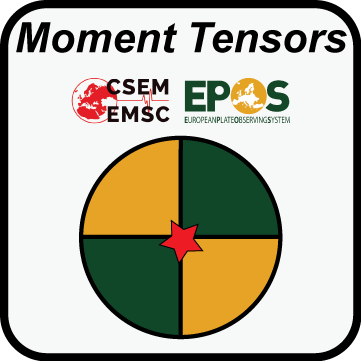

In [1]:
from IPython.core.display import Image, display, HTML
display(Image('FIG_EPOS_WS_Moment-Tensors.png', width=300))

In [2]:
from IPython.display import HTML
HTML('<iframe src=http://www.seismicportal.eu/mtws/ width=800 height=400></iframe>')

In [3]:
# ==================================
# Main functions used
# ==================================
#
# Func-Download
def geturl(url):
    import requests
    res = requests.get(url, timeout=15)
    return {'status': res.status_code,
            'content': res.text}
#
# Func-Parse (txt)
def parsecsv(txt, usedict=False):
    import csv
    from io import StringIO
    if usedict:
        parser = csv.DictReader(StringIO(txt), delimiter='|')
    else:
        parser = csv.reader(StringIO(txt), delimiter='|')        
    return [line for line in parser]
# ==================================

In [4]:
%%capture all_mt

# ==================================
# Moment Tensor - Example 1
# Multiple events case.
# ==================================
#
# Build URL
url = 'http://vigogne.emsc-csem.org/mtws/api/search\
?starttime=2017-10-01&endtime=2017-10-19&minmag=6&format=text'
#
# Download
res = geturl(url)
#
# Parse
mt_data = parsecsv(res['content'], usedict=True)
#
# How many distinct events?
allid = set([ mt['#ev_unid'] for mt in mt_data ])
print("<Raw selection - all MT available:\ndata recovered contains {0} events for {1} moment-tensors >\n".format(len(allid), len(mt_data)))
#
# Print data
for mt in mt_data:
    print("{mt_source_catalog:4} --> Unid: {#ev_unid}, Strike: {mt_strike_1:4}, Dip: {mt_dip_1:3}, Rake: {mt_rake_1:4}".format(**mt))
# ==================================    

In [5]:
%%capture aut_mt          

# ==================================
# Moment Tensor - Example 2
# Authoritative law "preferredOnly".
# ==================================
#
# Build URL custom with "preferredOnly"
url = 'http://vigogne.emsc-csem.org/mtws/api/search\
?starttime=2017-10-01&endtime=2017-10-19&minmag=6&format=text&preferredOnly=true'
#
# Download and Parse
mt_data = parsecsv(geturl(url)['content'], usedict=True)
#
# How many distinct events?
allid = set([ mt['#ev_unid'] for mt in mt_data ])
print("\n<Authoritative law - preferredOnly rule:\ndata recovered contains {0} events for {1} moment-tensors >\n".format(len(allid), len(mt_data)))
#
# Print data
for mt in mt_data:
    print("{mt_source_catalog:4} --> Unid: {#ev_unid}, Strike: {mt_strike_1:4}, Dip: {mt_dip_1:3}, Rake: {mt_rake_1:4}".format(**mt))
# ==================================    

In [6]:
all_mt() # Print multiple events case.
aut_mt() # Print authoritative law "preferredOnly"

<Raw selection - all MT available:
data recovered contains 6 events for 30 moment-tensors >

GCMT --> Unid: 20171018_0000044, Strike: 214 , Dip: 21 , Rake: 97  
CPPT --> Unid: 20171018_0000044, Strike: 237 , Dip: 16 , Rake: 121 
GFZ  --> Unid: 20171018_0000044, Strike: 223 , Dip: 14 , Rake: 104 
IPGP --> Unid: 20171018_0000044, Strike: 232 , Dip: 19 , Rake: 115 
USGS --> Unid: 20171018_0000044, Strike: 201 , Dip: 26 , Rake: 78  
GCMT --> Unid: 20171010_0000169, Strike: 218 , Dip: 85 , Rake: -180
GFZ  --> Unid: 20171010_0000169, Strike: 309 , Dip: 88 , Rake: 5   
CPPT --> Unid: 20171010_0000169, Strike: 310 , Dip: 79 , Rake: 4   
USGS --> Unid: 20171010_0000169, Strike: 310 , Dip: 84 , Rake: -3  
IPGP --> Unid: 20171010_0000169, Strike: 130 , Dip: 90 , Rake: 3   
GCMT --> Unid: 20171008_0000103, Strike: 220 , Dip: 39 , Rake: 5   
CPPT --> Unid: 20171008_0000103, Strike: 221 , Dip: 49 , Rake: 3   
USGS --> Unid: 20171008_0000103, Strike: 217 , Dip: 43 , Rake: 4   
GFZ  --> Unid: 20171008

As long as no authoritative rule exists to define a **preferred** *moment tensor solution*, the following criteria have been arbitrarily chosen (fore more details, see [Moment Tensor Web Service Specifications](https://www.emsc-csem.org/Files/epos/specifications/Specs_MT-WS.pdf)):

    1- Online services providing moment tensors with a global coverage are considered first.
       
       If possible, the preferred solution will be firstly:
       
       => from Global CMT, then
        => from USGS, then
         => from CPPT and then
          => from INGV.

    2- If no solution is found, the moment tensor having the centroid location the closest to the EMSC event location (referenced by the UNID) is chosen.

## <p style="text-align: center"> 2. Use of the HMB <span style="color:red"> Messaging Service </span> </p>

### Envisioned mechanism to test MT-rules


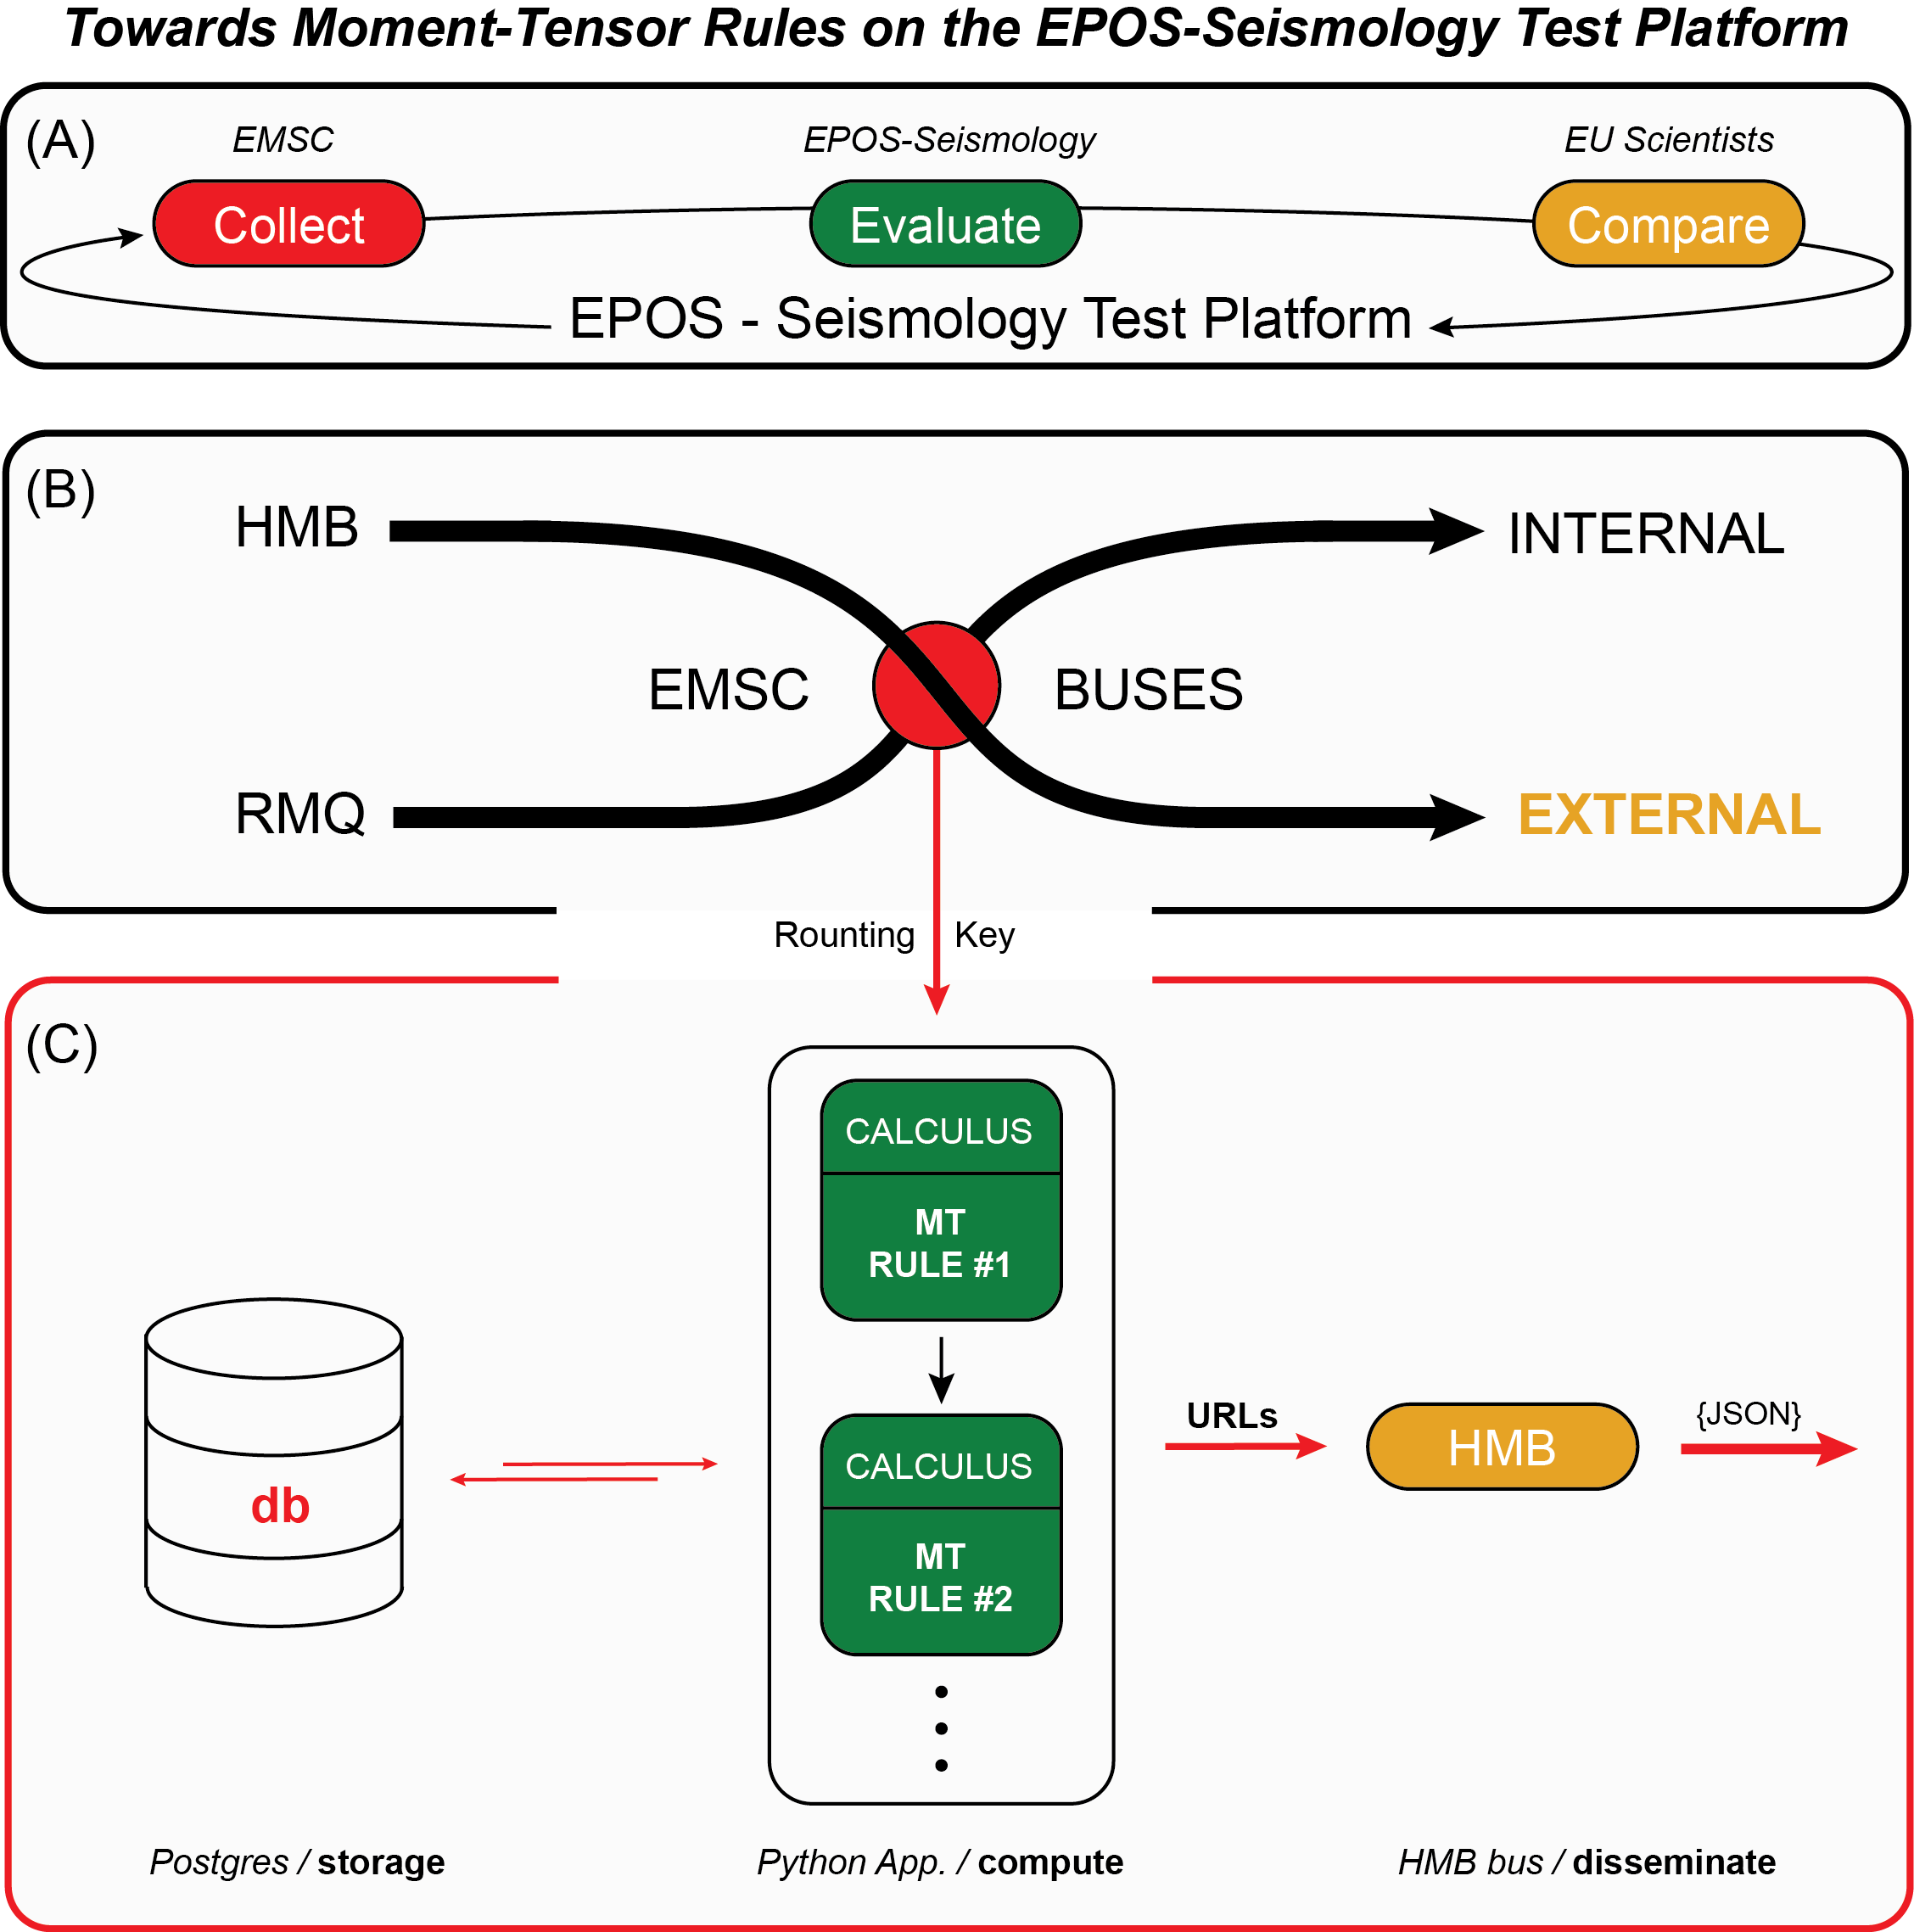

In [7]:
from IPython.core.display import Image, display, HTML
display(Image('FIG_EPOS_Testplatform_MTrule.png', width=800))

### What are the MT-rules?

* Rule #0 => Centroïd the closest to EMSC solution. 
* Rule #1 => Moment tensor the first published by an european seismological agency.
* Rule #2 => Moment tensor where the MW magnitude is the strongest.
* Rule #3 => Moment tensor where the seismic moment is the highest.

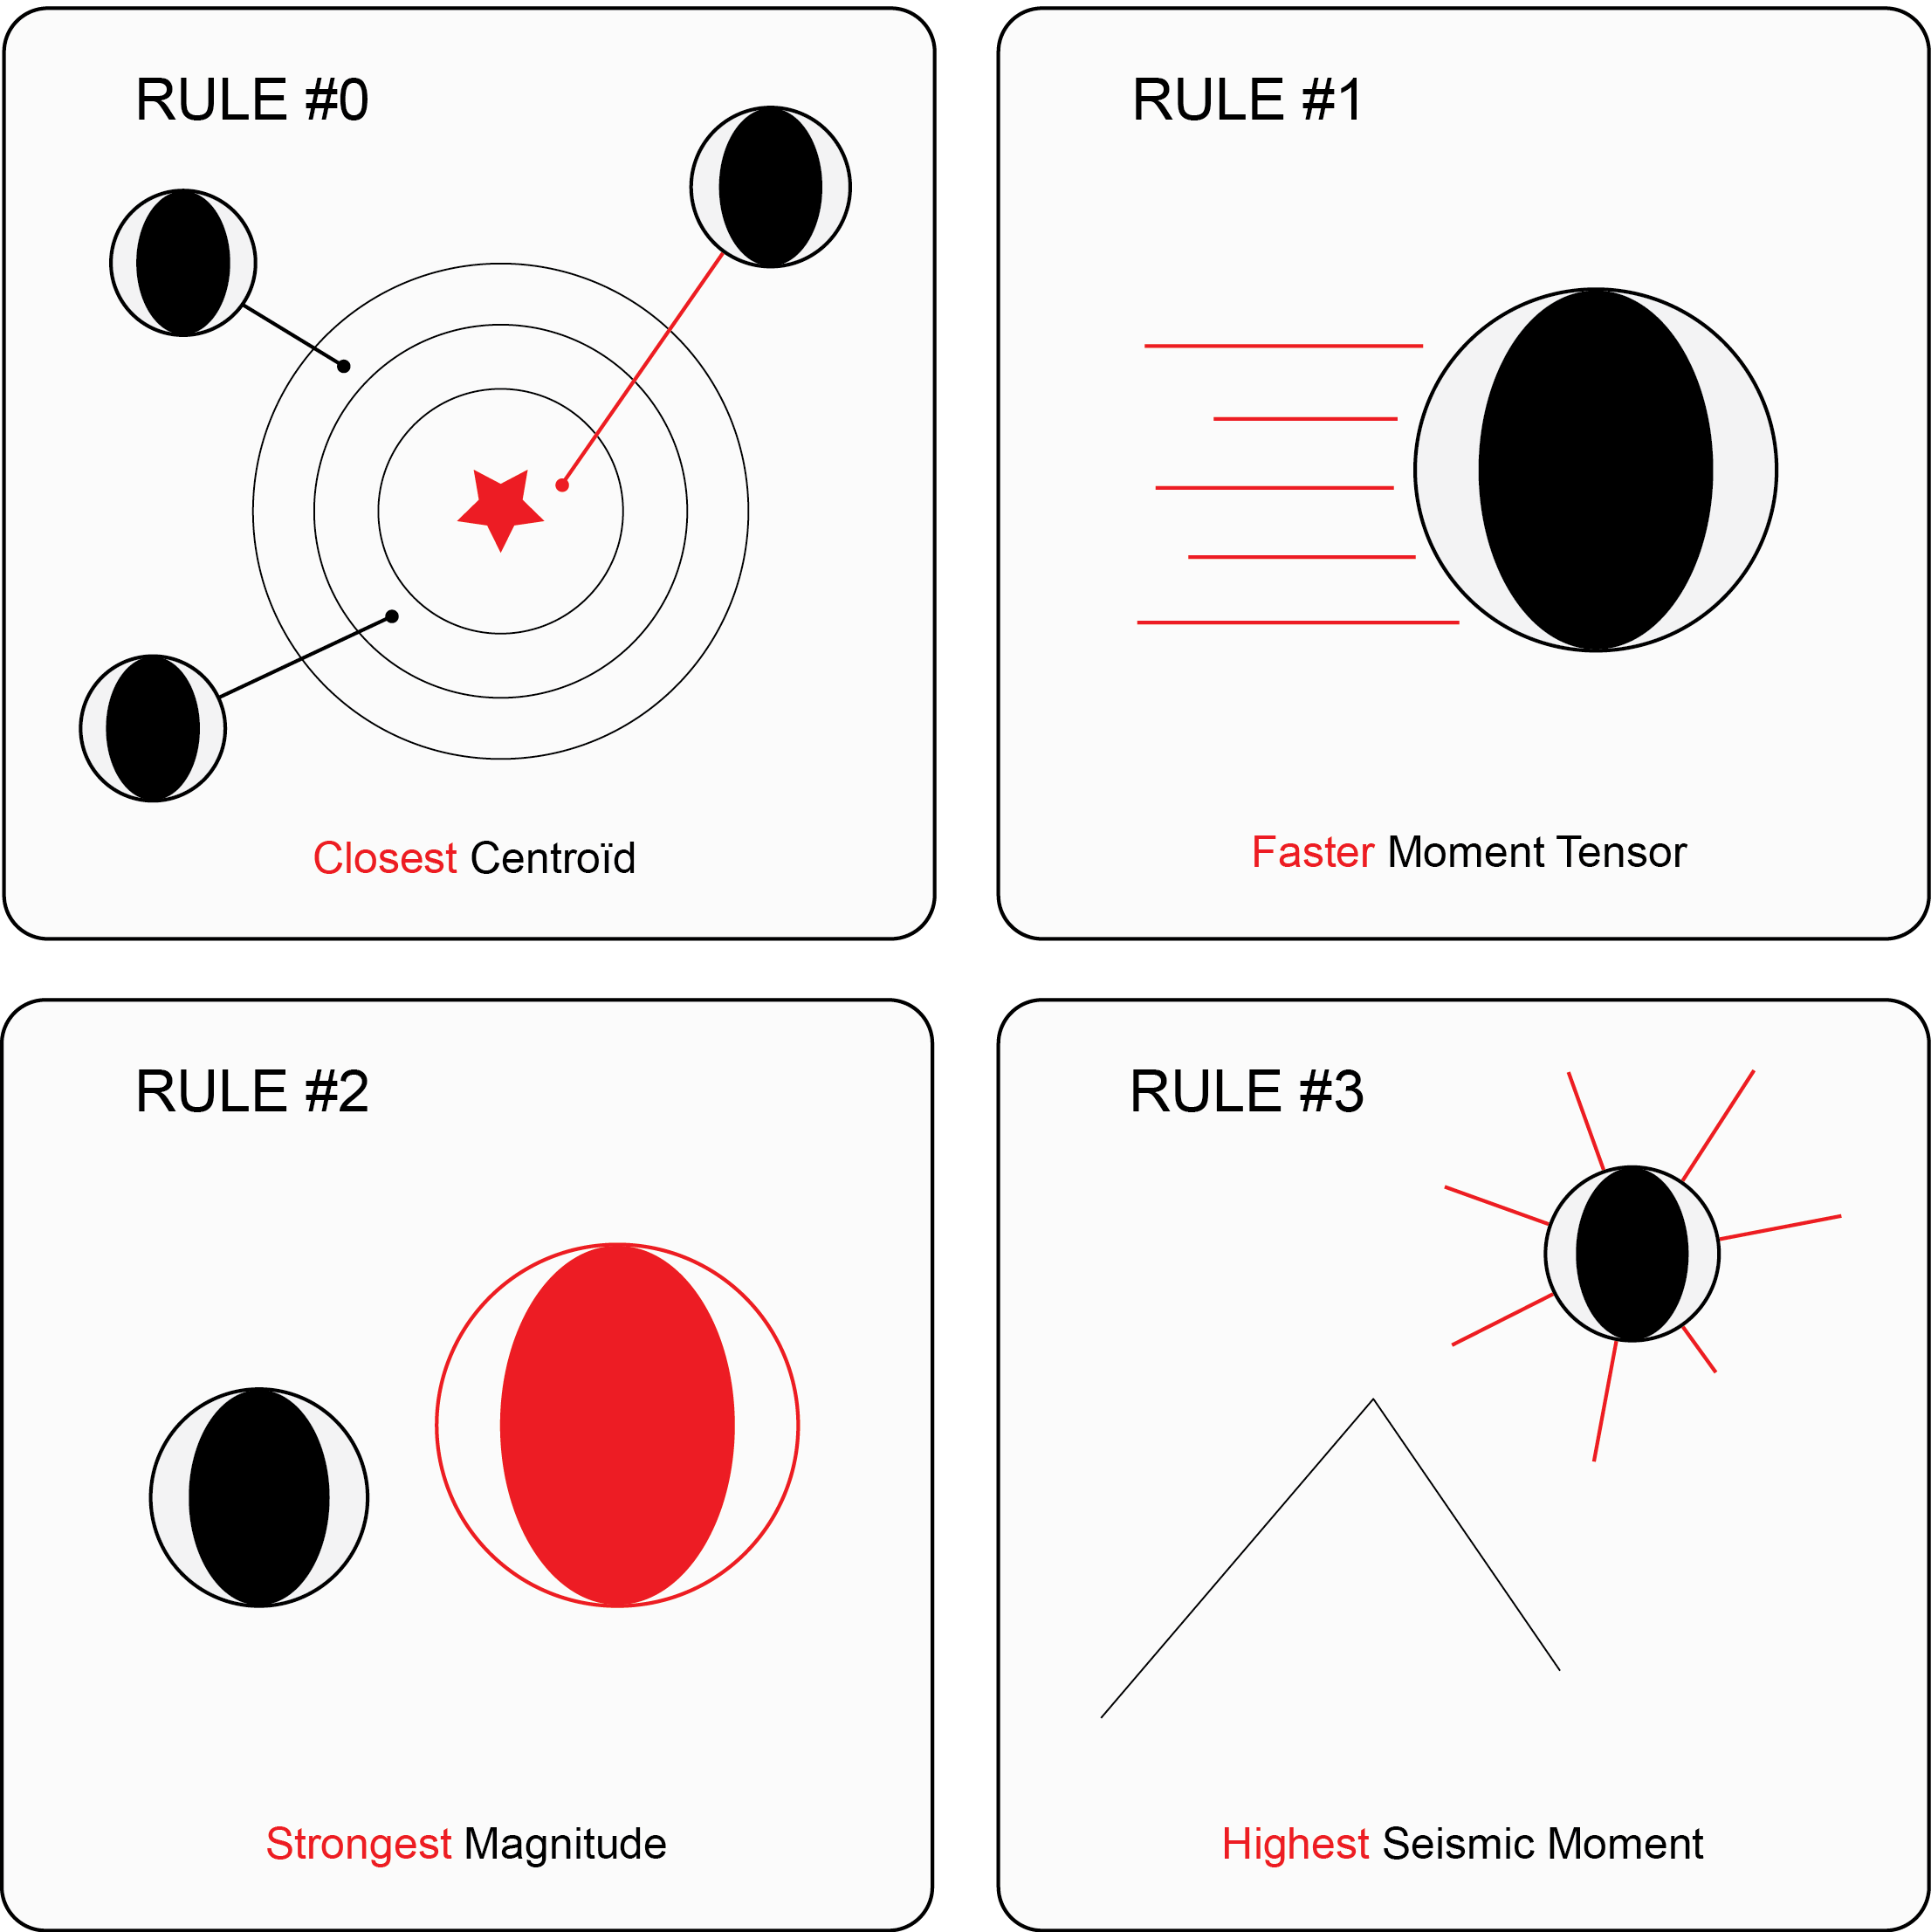

In [8]:
from IPython.core.display import Image, display, HTML
display(Image('FIG_EPOS_Testplatform_MTrule_Frames.png', width=600))

### How to recover MT-data in JSON format thanks to HMB?

In [ ]:
#!/usr/bin/env python
#-*-coding:utf-8-*-
"""
Copyright (c) 2015, EPOS Project
EMSC - 01/09/2017
"""

import os, sys
import bson.json_util
from urllib import urlopen

# Choose here the bus to subsribe:
#BUS='http://cerf.emsc-csem.org:80/MTtest_rule0' # CLOSEST
BUS='http://cerf.emsc-csem.org:80/MTtest_rule1'  # FASTER
#BUS='http://cerf.emsc-csem.org:80/MTtest_rule2' # STRONGEST
#BUS='http://cerf.emsc-csem.org:80/MTtest_rule3' # HIGHEST

def utctime():
    ''' UTC timestamp '''
    import time, datetime
    ts = time.time()
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    return st

print("\nConnecting to {0} and receiving objects:\n".format(BUS))

param = {
    'heartbeat': 10,
    'queue': {
        'SYSTEM_ALERT': {
            'seq': -1
        }
    }
}

ack = bson.BSON(urlopen(BUS + '/open', bson.BSON.encode(param)).read()).decode()

print bson.json_util.dumps(ack, indent=2)

for msg in bson.decode_file_iter(urlopen(BUS + '/stream/' + str(ack['sid']))):

    try:

        QUEUE     = msg['queue']            # Name of the queue....[OK]
        TYPE      = msg['type']             # Queue type...........[OK]
        SENDER    = msg['sender']           # Name of the sender...[OK]
        SEQ       = msg['seq']              # Sequence number......[OK]
        LEVEL     = msg['data']['level']    # Level / action.......[OK]
        DATA      = msg['data']['text']     # Data exchanged.......[OK]
        FILENAME  = msg['data']['filename'] # Name of the file.....[OK]

        if LEVEL=='txt':
            ''' TEXT Mode '''
            print("[{0} UTC] {1}".format(utctime(), DATA))

        elif LEVEL=='img':
            ''' IMG Mode '''
            import base64
            print("Receiving IMG file...[OK]\t <{0}>".format(FILENAME))
            f = open(FILENAME, 'wb')
            f.write(DATA.decode('base64'))
            f.close()

        elif LEVEL=='qml':
            ''' XML Mode '''
            print("Receiving XML file...[OK]\t <{0}>".format(FILENAME))
            f= open(FILENAME, 'w')
            f.write(DATA.encode('utf-8'))
            f.close()

        else:
            pass

    except:
        pass


Connecting to http://cerf.emsc-csem.org:80/MTtest_rule1 and receiving objects:

{
  "queue": {
    "SYSTEM_ALERT": {
      "seq": 1, 
      "error": null
    }
  }, 
  "cid": "zI4gPnylqMF3ORcJ", 
  "sid": "AAVwufOwfBB5UQBi"
}


### Below is presented a more sophisticated piece of code allowing automatic reconnection to the server by Robert Steed (EMSC). Please do not hesitate to contact him for more information.

In [ ]:
#!/usr/bin/env python27
"""Module for sending messages to an httpmsgbus server.
   For more informations, please contact Robert Steed @ EMSC """
import requests
import time
import json
import logging
import bson
import numbers

######## Default Logger #####
logger = logging.getLogger("hmb_messaging")
logger.setLevel(logging.INFO)
if not logger.handlers:
    # create console handler and set level to warning
    ch = logging.StreamHandler()
    ch.setLevel(logging.INFO)
    # create formatter
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(name)s.%(process)d - %(message)s')
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)
#############################


class Hmbsession(object):
    def __init__(self, url, param={}, logger=logger, retry_wait=1, use_bson=False, autocreate_queues=False, **kwargs):
        """opens a session with an hmb server at provided url.
        
       param = {
                "cid": <string>,
                "heartbeat": <int>,
                "recv_limit": <int>,
                "queue": {
                    <queue_name>: {
                        "topics": <list of string>,
                        "seq": <int>,
                        "endseq": <int>,
                        "starttime": <string>,
                        "endtime": <string>,
                        "filter": <doc>,
                        "qlen": <int>,
                        "oowait": <int>,
                        "keep": <bool>
                        },
                    ...
                    },
                }
       """
        self.url = url
        self.param = param
        self.connection_kwargs = kwargs
        self._logger = logger
        self.retry_wait = retry_wait
        self._sid = None
        self._oid = ''
        self._use_json = not use_bson #flag selecting format of messages: either json or bson
        self._autocreate_queues = autocreate_queues #This might sometimes prevent issues over missing queues
        """
        if 'queue' in self.param:
            # initially set 'keep' to false to get pending data
            for q in self.param['queue'].values():
                q['keep'] = False
        """
    
    def _open(self):
        """opens the HMB session"""
        try:
            headers = {"Content-type": "application/json" if self._use_json else "application/bson"}
            r = requests.post(self.url + '/open', 
                        data=json.dumps(self.param) if self._use_json else bson.BSON.encode(self.param),
                        headers=headers, **self.connection_kwargs)

            if r.status_code == 400:
                raise requests.exceptions.RequestException("bad request: " + r.text.strip())

            elif r.status_code == 503:
                raise requests.exceptions.RequestException("service unavailable: " + r.text.strip())

            r.raise_for_status()

            ack = r.json() if self._use_json else bson.BSON(r.content).decode()
            self._sid = ack['sid']
            self._oid = ''
            self.param['cid'] = ack['cid']
            
            qinfo = ack.get('queue',{})
            for qname,queue in qinfo.items():
                seqnext = queue['seq']
                if isinstance(seqnext,numbers.Integral) and qname in self.param['queue']:
                    if seqnext > self.param['queue'][qname].get('seq',None):
                        self.param['queue'][qname]['seq'] = seqnext #next message number
            
            #errors or missing queues
            for qname,queue in qinfo.items():
                error = queue.get('error',None)
                if error:
                    self._logger.warning("HMB server gives an error for queue '%s': %s",qname,error)
                    
                    #if queue not found then create queue?
                    if error == u'queue not found' and self._autocreate_queues:
                        msg = {'type':'TOUCH','queue':qname}
                        self.send({'0':msg} if self._use_json else msg)
                        self.param['queue'][qname]['seq'] = 1
                        self._logger.warning("created queue '%s' by sending test message",qname)
                    
            
            self._logger.info("session opened, sid=%s, cid=%s",ack['sid'], ack['cid'])
            self._logger.info("session parameters are: %r",self.param)

        except requests.exceptions.RequestException as e:
            errmsg = str(e)
            if "service unavailable" in errmsg: 
                errmsg = "service unavailable: The server is down due to maintenance downtime or capacity problems"
            self._logger.warning("error: %s",errmsg)
            self._logger.warning("connection to message bus failed")
            
    def info(self):
        """gets info from the hmb server on defined queues, topics and available
        data."""
        try:
            return self._info_request('info')
        except requests.exceptions.RequestException as e:
            self._logger.error("error getting info: %s",str(e))
            return None

    def features(self):
        """gets functions and capabilities supported by the server and optionally
        the name and version of the server software."""
        try:
            return self._info_request('features')
        except requests.exceptions.RequestException as e:
            self._logger.error("error getting features: %s",str(e))
            return None
    
    def status(self):
        """gets status of connected clients (sessions)."""
        try:
            return self._info_request('status')
        except requests.exceptions.RequestException as e:
            self._logger.error("error getting status: %s",str(e))
            return None
    
    def _info_request(self,cmd):
        """gets info, functions and capabilities supported by the server."""
        r = requests.get(self.url + '/'+cmd, **self.connection_kwargs)

        if r.status_code == 400:
            raise requests.exceptions.RequestException("bad request: " + r.text.strip())

        elif r.status_code == 503:
            raise requests.exceptions.RequestException("service unavailable: " + r.text.strip())

        r.raise_for_status()     
        
        return r.json()
                        
    def set_format(self,use_bson):
        """defines whether connection object should use bson or json 
        note that this may force the connection to the server to be reestablished.
        """
        if not isinstance(use_bson,bool): 
            raise TypeError("use_bson must be a boolean value")
        if self._use_json != use_bson:
            #no change to format so do nothing
            pass
        else:
            self._use_json = not use_bson
            self._sid = None #mark session as closed
    
    def send_msg(self,mtype,queue,data,topic=None,retries=1,**kwargs):
        """send single message to HMB session.
            mtype - message type (string)
            queue - destination queue of the message
            data - json compatible payload
            topic - optional tag for the message
            retries - number of times to retry sending message
            kwargs - any extra keyvalues to put in the message ie. seq, starttime, endtime
        """
        msg = {"type":mtype,
               "queue":queue,
               "data":data}
        if topic: msg["topic"] = topic
        for k,v in kwargs.items(): msg["k"] = v
        
        if self._use_json: msg = {0:msg} #json messages always require multi-message format
        else: pass #bson messages use a different type of concatenation
        
        self.send(msg,retries)        
    
    def send(self,msg,retries=1):
        """send message to HMB session. Handles disconnections and retries
        sending the message. The message should have the correct hmb format.
        """                    
        for i in range(retries+1):
            try:
                if not self._sid:
                    self._open()
                self._send(msg)
            except Exception as e:
                self._sid = None #mark session as closed
                if i == retries:
                    self._logger.error("error: %s",str(e))
                    self._logger.error("problem msg: %s", msg) #the first time it probably isn't the message's fault
                elif i == 0:
                    self._logger.info("error: %s",str(e))
                    self._logger.info("closing connection to message bus lost, retrying")
                else:
                    self._logger.warning("error: %s",str(e))
                    self._logger.warning("problem msg: %s", msg) #the first time it probably isn't the message's fault
                    self._logger.warning("closing connection to message bus lost, retrying in %d seconds", self.retry_wait)
                    time.sleep(self.retry_wait) #don't wait on the first retry
                    
            else: #if no exceptions -
                break
        
    def _send(self,msg):
        """actually sends message to HMB session"""
        r = requests.post(self.url + '/send/' + self._sid,
                    headers={"Content-type": "application/json" if self._use_json else "application/bson"},
                    data=json.dumps(msg,allow_nan=False) if self._use_json else bson.BSON.encode(msg),
                    **self.connection_kwargs)

        if r.status_code == 400:
            raise requests.exceptions.RequestException("bad request: " + r.text.strip())

        elif r.status_code == 503:
            raise requests.exceptions.RequestException("service unavailable: " + r.text.strip())

        r.raise_for_status()        
    
    def recv_all(self,retries=1,timeout=None):
        """receives all messages from an HMB query. This should not be 
        used for realtime operation."""
        starttime = time.time()
        starttime -= 0.2 #correction factor so that timeout works as expected.
        messages = [] 
        while True:
            subset = self.recv(retries=retries)
            if not subset: #no messages received
                pass #(continue)
            elif subset[-1]['type'] != 'EOF':
                messages += subset
            else:
                messages += subset[:-1]
                break
            
            if timeout and time.time() > starttime + timeout:
                self._sid = None
                break
        return messages
        
    def recv(self,retries=1):
        """receives messages from HMB session. Request is blocking until the 
        next heartbeat message if "keep=True" is specified in the connection
        parameters for any of the queues.. HEARTBEAT messages are 
        elimated but EOF messages are kept so that we know when the end of 
        the stream is reached."""
        messages = []
        
        for i in range(retries+1):
            try:
                if not self._sid:
                    self._open()
                messages = self._recv()
            except Exception as e:
                self._sid = None #mark session as closed
                if i == retries:
                    self._logger.error("error: %s",str(e))
                elif i == 0:
                    self._logger.info("error: %s",str(e))
                    self._logger.info("connection to message bus lost, retrying")
                else:
                    self._logger.warning("error: %s",str(e))
                    self._logger.warning("connection to message bus lost, retrying in %d seconds", self.retry_wait)
                    time.sleep(self.retry_wait) #don't wait on the first retry
                
            else: #if no exceptions.
                break
        #else:
        #    raise
                
        #eliminate HEARTBEAT messages
        messages = [m for m in messages if m['type'] not in ('HEARTBEAT',)]
        return messages
                
    def _recv(self):
        """actually receive messages from HMB. Request is blocking if "keep=True"
        is specified in the connection parameters for any of the queues."""
        r = requests.get(self.url + '/recv/' + self._sid + self._oid, **self.connection_kwargs)
        
        if r.status_code == 400:
            raise requests.exceptions.RequestException("bad request: " + r.text.strip())

        elif r.status_code == 503:
            raise requests.exceptions.RequestException("service unavailable: " + r.text.strip())

        r.raise_for_status()
        
        if self._use_json:
            msgdict = r.json() # can be multiple messages
            messages = [msgdict[str(i)] for i in range(len(msgdict))] #convert to list
        else: #bson
            messages = bson.decode_all(r.content)
            
        #print r.content
        #print 
        #print msgdict
        #print
        
        ###
        seqnum = None
        for obj in messages:
            #extracts sequence number from messages to ensure future continuity of messages received.
            if 'seq' in obj and 'queue' in obj:
                seqnum = obj['seq']
                if isinstance(seqnum,numbers.Integral):
                    if seqnum >= self.param['queue'][obj['queue']]['seq']:
                        self.param['queue'][obj['queue']]['seq'] = seqnum + 1 #next message number
                    self._oid = '/%s/%d' % (obj['queue'], seqnum)
        
        #closing session if EOF message is last message received
        if obj['type'] == 'EOF': #will always be the last message?
            self._sid = None #close current session when we reach latest message.
        
        #changing queues to realtime mode
        #is this useful?
        """ 
        try:
            if obj['type'] == 'EOF':
                self._sid = None #close current session when we reach latest message.

                for q in self.param['queue'].values():
                    q['keep'] = True #change session connection parameters to keep session alive 
        except KeyError:
            pass
        """
        ###
        
        return messages

    
#############################


def example0():
    """Very basic example of receiving HMB messages"""
    # Choose here the bus to subsribe:
    #hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule0' # CLOSEST
    hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule1' # FASTER
    #hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule2' # STRONGEST
    #hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule3' # HIGHEST
    
    param = {
            'queue': {
                'SYSTEM_ALERT': { #choose queue to listen on
                        'seq': -5,  #choose message to start at.
                        'keep': True  #make request blocking
                        }
                }
            }
    #each message in the queue has a sequence number. Setting:
    #seq=-1 => start with next new message
    #seq=-2 => start with most recent message
    #seq=-3 => start with message before the last message.
    #...
    #seq=10 => start with the 10th message in the queue
    
    hmbconn = Hmbsession(url=hmbbus, param=param, use_bson=False)
    
    msgs = hmbconn.recv()
    for msg in msgs:
        logger.info('msg: %r',msg)
        
def example1():
    """Basic example of receiving HMB messages with some robustness"""
    # Choose here the bus to subsribe:
    #hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule0' # CLOSEST
    hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule1' # FASTER
    #hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule2' # STRONGEST
    #hmbbus='http://cerf.emsc-csem.org:80/MTtest_rule3' # HIGHEST
    
    param = {
            'heartbeat': 10, #sec
            'queue': {
                'SYSTEM_ALERT': { #choose queue to listen on
                        'seq': -1,  #choose message to start at.
                        'keep': True,  #make request blocking
                        #'topics': [],
                        }
                }
            }
    
    hmbconn = Hmbsession(url=hmbbus, param=param, use_bson=True, retry_wait=2, timeout=(6.05,11), autocreate_queues=True)
    #setup timeouts just longer than the heartbeat rate
    #set a delay between retries
        
    while True:
        msgs = hmbconn.recv(retries=10)
        #the method will retry in the event of an error or timeout by reopening a
        #new connection to the server and trying again.
        
        #nb. msgs might be empty due to eliminated heartbeat messages
        for msg in msgs:
            logger.info('msg: %r',msg)
    

#if __name__ == "__main__":


In [ ]:
example1()
#example0()